# UAS PENAMBANGAN DATA : Early Stage Diabetes Risk Prediction

Saya mengambil data Diagnosa Penyakit Diabetes tahap awal dari website https://archive.ics.uci.edu/ yang selanjutnya akan saya uji sebagai proyek dari matakuliah saya, yaitu matakuliah Penambangan Data. Untuk lebih jelasnya dapat disimak langkah-langkah kami dalam mengerjakan proyek ini.

## 1. Data Understanding (Memahami Data)

Pada pekerjaan kali ini, saya akan melakukan klasifikasi untuk prediksi penyakit jantung. Tujuan dari pekerjaan ini adalah untuk membantu dalam memprediksi adanya peyakit diabetes tahap awal pada individu berdasarkan berbagai fitur yang tersedia. Dataset yang kami gunakan adalah dataset "Early Stage Diabetes Risk Prediction" yang kami ambil dari UCI Machine Learning Respository . Dataset ini berasal dari Rumah Sakit di Sylhet, Bangladesh dan disetujui oleh dokter.

Langkah pertama yang dilakukan adalah mengumpulkan data. Data tersebut berada di aiven.com, sehingga data perlu ditarik dari sumber tersebut. Dataset ini terdiri dari 520 baris dan 16 fitur, yaitu Age, Sex, Polyuria, Polydipsia, Sudden weight loss, Weakness, Polyphagia, Genital thrush, Visual blurring, Itching, Irritability, Delayed healing, Partial paresis, Muscle, Alopecia, Obseit, Class.

Terdapat 2 type data dalam dataset ini, yakni catagorial dan integer :

- Tipe data categorical, juga dikenal sebagai tipe data katagorikal, merujuk pada variabe yang menggambarkan kategori atau kelompok yang berbeda

- Tipe data integer merujuk pada nilai-nilai yang terdiri dari angka

### Menampilkan Data

Berikut adalah cara untuk menampilkan dataset Early Stage Diabetes Risk Prediction

In [ ]:
df_1 = _deepnote_execute_sql('SELECT * FROM `defaultdb`.`diabetes_data_upload`\n', 'SQL_8DFE5701_7CCC_4540_8BE2_3730036AC0BF', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,10,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive
2,100,39,Female,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Positive
3,101,48,Female,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Positive
4,102,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,95,36,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
516,96,56,Female,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No,Positive
517,97,30,Female,Yes,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,No,No,Positive
518,98,31,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,Positive


Selanjutnya, untuk mengetahui jumlah baris dan kolom yang terdapat pada dataset, berikut adalah cara untuk menampilkan jumlah baris dan kolom:

In [ ]:
import numpy as np  # Import library numpy
import pandas as pd  # Import library pandas
df = pd.read_csv('diabetes_data_upload.csv')  # Membaca file dataset.csv dan menyimpannya ke dalam DataFrame df
df.shape  # Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame df

(520, 18)

Dari output diatas, dapat disimpulkan bahwa terdapat 520 baris data dan 18 kolom (18 fitur, 1 target dan 1 kolom untuk ID).

### Menentukan Missing Value

Missing Value adalah hilangnya beberapa data yang telah diperoleh. Menangani missing value dengan tepat sangat penting untuk memastikan integritas dan akurasi analisis data. Pada dataset  Early Stage Diabetes Risk Prediction selanjutnya dilakukan pengecekan missing value sebagai berikut:

In [ ]:
import numpy as np  
import pandas as pd 
df = pd.read_csv('diabetes_data_upload.csv') 
df.isnull().sum()

id                    0
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

KESIMPULAN: dapat dilihat bahwa tidak terdapat missing values dalam dataset sehingga tidak dibutuhkan proses lebih lanjut untuk penanganan missing value.

### Mengeksplorasi Data (Numerik)

Selanjutnya melakukan eksplorasi data numerik dengan rincian sebagai berikut :

df.describe() hanya digunakan untuk tipe data numerik 
Count: Jumlah data dalam setiap kolom.
Mean: Rata-rata nilai dalam setiap kolom.
Std (Standard Deviation): Standar Deviasi dari nilai dalam setiap kolom.
Min: Nilai minimum dalam setiap kolom.
25%, 50%, 75% (quartiles): Nilai-nilai kuartil yang membagi data menjadi empat bagian sama besar. Kuartil ke-50 adalah median.
Max: Nilai maksimum dalam setiap kolom.

Berikut merupakan program untuk eksplorasi data numerik:

In [ ]:
import numpy as np  # Import library numpy
import pandas as pd  # Import library pandas
df = pd.read_csv('integer.csv')  # Membaca file dataset.csv
df.describe() #hanya berlaku untuk type data integer

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Berikut adalah data numerik yang selanjutnya akan diakukan perhitungan manual:

<img src="image-20240626-141035.png" width="" align="" />

### Mengeksplorasi Data (Categorical)

Selanjutnya melakukan eksplorasi data kategorikal. Pada kegiatan ini, dilakukan perhitungan modus (nilai paling sering muncul). Berikut merupakan program untuk mengetahui modus dari suatu data:

In [ ]:
# Langkah 1: Impor pustaka pandas
import pandas as pd

# Langkah 2: Baca file CSV menggunakan pd.read_csv
# Ganti 'nama_file.csv' dengan nama file CSV yang sesuai dengan data Anda
data = pd.read_csv('categorical.csv')

# Langkah 3: Hitung modus untuk setiap kolom kategori menggunakan mode()
modus = data.mode()

# Langkah 4: Tampilkan hasil modus
print("Modus untuk setiap kolom kategori:")
print(modus)

Modus untuk setiap kolom kategori:
  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   Male       No         No                 No      Yes         No   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No      No           No              No   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No               No       No      No  Positive  


Berikut merupakan data categorical yang terdapat dalam dataset:

<img src="image-20240626-142350.png" width="" align="" />

### Menentukan Outlier

Outlier adalah data yang berbeda secara signifikan dari data lain dalam sebuah set data. Mereka bisa menjadi nilai yang sangat kecil atau sangat besar dibandingkan dengan nilai rata-rata atau mayoritas data lainnya.

LOF (Local Outlier Factor) adalah metode statistik yang digunakan untuk mendeteksi outlier dalam sebuah set data. Metode ini menghitung seberapa jauh suatu titik data berada dari tetangga-tetangganya dalam konteks data tersebut. LOF memberikan nilai yang menggambarkan seberapa "aneh" atau tidak biasa suatu titik data dibandingkan dengan tetangganya. 

Berikut merupakan implementasi dari perhitungan LOF dengan menggunakan library Scikit Learn.

In [ ]:
# Mengimpor pustaka pandas dengan alias 'pd'.
import pandas as pd

# Mengimpor kelas LocalOutlierFactor dari modul neighbors di pustaka Scikit-learn (sklearn).
from sklearn.neighbors import LocalOutlierFactor

# Membaca dataset dari file CSV ("dataset.csv") ke dalam DataFrame X menggunakan Pandas.
X = pd.read_csv("data_diabet.csv")

# Membuat objek LocalOutlierFactor (LOF).
# n_neighbors=5 menentukan jumlah tetangga yang akan digunakan dalam perhitungan LOF.
# contamination=0.1 menentukan tingkat kontaminasi atau persentase outlier yang diharapkan dalam data.
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

# Menggunakan metode fit_predict() dari objek LOF untuk menentukan status outlier (outlier atau bukan) untuk setiap sampel dalam data.
# Hasilnya akan berupa array yang berisi prediksi status outlier untuk setiap sampel.
y_pred = lof.fit_predict(X)

# Mencetak tabel prediksi status outlier.
print("Predicted table:", y_pred)

# Mencetak nilai LOF yang bersifat negatif.
# Negative LOF scores memberikan informasi tentang seberapa jauh setiap sampel berada dari tetangganya dalam konteks outlier detection.
print("Negative LOF scores:", -lof.negative_outlier_factor_)

# Cari indeks dari nilai -1 dalam array y_pred
outlier_indices = [index for index, value in enumerate(y_pred) if value == -1]

# Cetak indeks dari nilai -1 untuk mengetahui data ke berapa yang dianggap sebagai outlier
print("Data outlier terdapat pada indeks:", outlier_indices)

Predicted table: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1
  1  1  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1 -1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1 

KESIMPULAN: Disini asumsinya adalah 0.1(10%) dari seluruh data dianggap outlier. output -1 adalah ciri-ciri dari outlier. dan output yang menunjukkan angka-angka desimal yang lebih tinggi dari angka-angka desimal lainnya merupakan outliernya. hal ini ditunjukkan pada indeks ke [37, 68, 72, 87, 88, 95, 100, 101, 102, 108, 132, 133, 160, 161, 173, 185, 186, 216, 217, 224, 242, 259, 266, 271, 274, 275, 283, 284, 314, 322, 333, 346, 363, 368, 371, 372, 374, 382, 383, 396, 399, 401, 410, 422, 423, 442, 462, 463, 471, 472, 489, 5

## 2. Preprocessing

Preprocessing adalah tahapan dalam proses analisis data yang melibatkan persiapan dan pembersihan data mentah agar siap untuk dianalisis atau dimasukkan ke dalam model. Langkah-langkah ini penting untuk memastikan bahwa data berada dalam format yang sesuai dan bebas dari kesalahan yang bisa mempengaruhi hasil analisis.

### Menghapus Outlier

Keberadaan outlier dapat mempengaruhi hasil analisis data, sehingga perlu untuk dilakukan  deteksi dan penghapusan outlier. Berikut merupakan program untuk menghapus outlier:

In [ ]:
# Mengimpor pustaka pandas dengan alias 'pd'.
import pandas as pd

# Mengimpor kelas LocalOutlierFactor dari modul neighbors di pustaka Scikit-learn (sklearn).
from sklearn.neighbors import LocalOutlierFactor

# Membaca dataset dari file CSV ("dataset.csv") ke dalam DataFrame X menggunakan Pandas.
X = pd.read_csv("data_diabet.csv")

# Membuat objek LocalOutlierFactor (LOF).
# n_neighbors=5 menentukan jumlah tetangga yang akan digunakan dalam perhitungan LOF.
# contamination=0.1 menentukan tingkat kontaminasi atau persentase outlier yang diharapkan dalam data.
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

# Menggunakan metode fit_predict() dari objek LOF untuk menentukan status outlier (outlier atau bukan) untuk setiap sampel dalam data.
# Hasilnya akan berupa array yang berisi prediksi status outlier untuk setiap sampel.
y_pred = lof.fit_predict(X)

# Cari indeks dari nilai -1 dalam array y_pred
outlier_indices = [index for index, value in enumerate(y_pred) if value == -1]

# Cetak indeks dari nilai -1 untuk mengetahui data ke berapa yang dianggap sebagai outlier
print("Data outlier terdapat pada indeks:", outlier_indices)

# Menghapus baris yang mengandung outlier dari DataFrame
X_cleaned = X.drop(outlier_indices)

# Menyimpan DataFrame yang telah dibersihkan ke file CSV baru
X_cleaned.to_csv("dataset_tanpa_outlier.csv", index=False)

# Menampilkan jumlah baris asli dan jumlah baris setelah outlier dihapus
print("Jumlah baris asli:", len(X))
print("Jumlah baris setelah outlier dihapus:", len(X_cleaned))
print("Dataset tanpa outlier telah disimpan ke 'dataset_tanpa_outlier.csv'")

Data outlier terdapat pada indeks: [37, 68, 72, 87, 88, 95, 100, 101, 102, 108, 132, 133, 160, 161, 173, 185, 186, 216, 217, 224, 242, 259, 266, 271, 274, 275, 283, 284, 314, 322, 333, 346, 363, 368, 371, 372, 374, 382, 383, 396, 399, 401, 410, 422, 423, 442, 462, 463, 471, 472, 489, 518]
Jumlah baris asli: 520
Jumlah baris setelah outlier dihapus: 468
Dataset tanpa outlier telah disimpan ke 'dataset_tanpa_outlier.csv'


Kesimpulan : Kode ini membaca dataset, mendeteksi outlier menggunakan metode Local Outlier Factor, lalu menghapus baris yang mengandung outlier, dan menyimpan dataset yang telah dibersihkan ke file baru yang bernama dataset_tanpa_outlier.csv. Jumlah baris asli adalah 502 baris, setelah outlier dihapus menjadi 468 baris.

### Pembagian Data

Dataset Heart Disease selanjutnya dibagi menjadi 80% sebagai data training untuk melakukan pelatihan data dan 20% sebagai data testing untuk melakukan pengujian data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca data dari file CSV
data = pd.read_csv('dataset_tanpa_outlier.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('class', axis=1)  # Sesuaikan dengan nama kolom target
y = data['class']

# Membagi data menjadi data pelatihan (80%) dan data pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data pada data pelatihan dan data pengujian
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))

# Menyimpan data pengujian ke dalam file CSV
testing_data = pd.concat([X_test, y_test], axis=1)
testing_data.to_csv('dataset_diabet.csv', index=False)

Jumlah data pelatihan: 374
Jumlah data pengujian: 94


Kesimpulan: Dari program diatas, dapat disimpulkan bahwa jumlah data training adalah 374 data, sedangkan jumlah data testing adalah sebanyak 94 data.

### Menyimpan Data Training dan Data Testing ke CSV

Selanjutnya kami menyimpan data training dan data testing ke dalam file csv untuk melakukan pemodelan pada tahap berikutnya. Menyimpan data training dan testing ke dalam file CSV membantu memastikan konsistensi, efisiensi, dan integritas dalam pengembangan dan evaluasi pada suatu model. Berikut adalah programnya:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca data dari file CSV
file_path = 'dataset_tanpa_outlier.csv'
df = pd.read_csv(file_path)

# Membagi data menjadi 80% untuk training dan 20% untuk testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Menyimpan data training ke file CSV
train_file_path = 'hd_training_80.csv'
train_df.to_csv(train_file_path, index=False)

# Menyimpan data testing ke file CSV
test_file_path = 'hd_testing_20.csv'
test_df.to_csv(test_file_path, index=False)

print(f"Data training telah disimpan ke {train_file_path}")
print(f"Data testing telah disimpan ke {test_file_path}")


Data training telah disimpan ke hd_training_80.csv
Data testing telah disimpan ke hd_testing_20.csv


Kesimpulan: Dari program diatas, data training disimpan dalam file yang bernama hd_training_80.csv dan data testing disimpan dalam file yang bernama hd_testing_20.csv. 

## 3. Pemodelan

Pemodelan dalam penambangan data adalah alat untuk mengubah data mentah menjadi wawasan berharga yang dapat digunakan untuk mendukung keputusan strategis dalam berbagai bidang.

### Prediksi Penyakit jantung Menggunakan Klasifikasi K-Nearest Neighbor (KNN)

K-Nearest Neighbors (KNN) adalah sebuah algoritma yang digunakan untuk memprediksi atau mengklasifikasikan data berdasarkan kesamaan dengan data yang sudah ada. Angka "K" dalam KNN mengacu pada jumlah tetangga terdekat yang akan dipertimbangkan untuk membuat prediksi. Misalnya, jika K = 3, maka KNN akan melihat 3 tetangga terdekat dari titik baru tersebut untuk membuat prediksi kelasnya.

Berikut merupakan program untuk mengetahui jumlah data yang akan menjadi pemodelan setelah preprocessing:

In [ ]:
import numpy as np  # Import library numpy
import pandas as pd  # Import library pandas
df = pd.read_csv('dataset_tanpa_outlier.csv')  # Membaca file dataset.csv dan menyimpannya ke dalam DataFrame df
df.shape  # Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame df

(468, 18)

Kesimpulan: Setelah dilakukannya preprocessing, maka sekarang jumlah baris datanya adalah 468 baris dan 18 kolom berisi 13 fitur dan 1 target.

Berikut merupakan program untuk menampilkan grafik data:

/tmp/ipykernel_49/707982571.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)  # Membuat histogram dari DataFrame df dan menampilkannya di axes ax


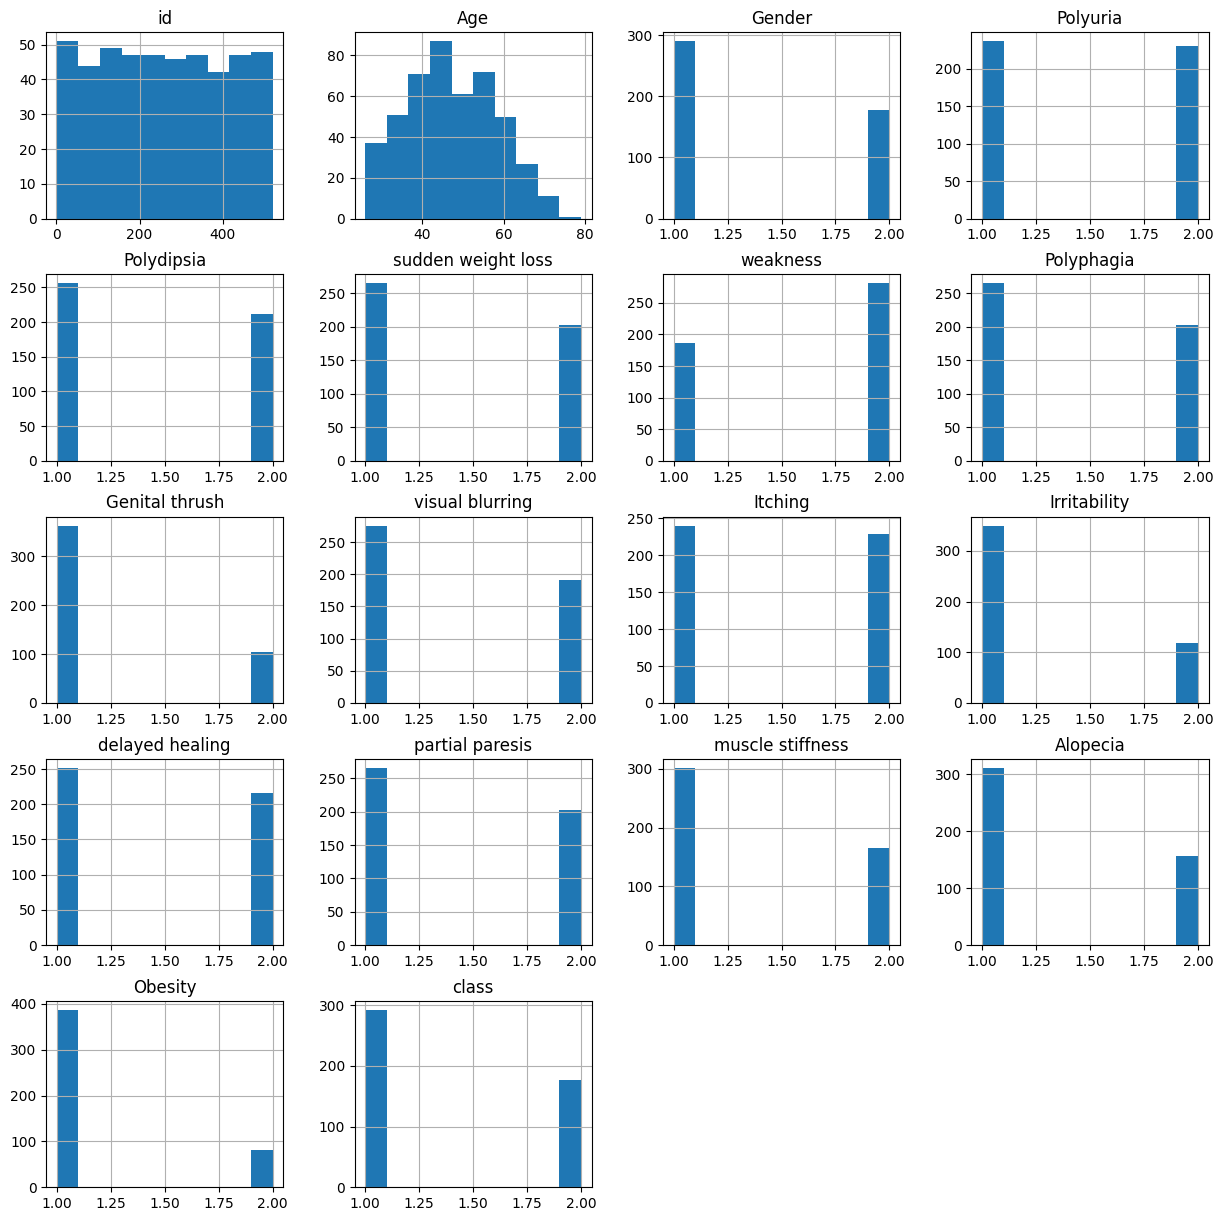

In [ ]:
import matplotlib.pyplot as plt  # Import library matplotlib untuk visualisasi data
%matplotlib inline  
import seaborn as sns  # Import library seaborn untuk visualisasi data statistik
fig = plt.figure(figsize=(15,15))  # Membuat objek figure dengan ukuran 15x15 inci
ax = fig.gca()  # Mengambil sumbu saat ini (axes) dari objek figure
g = df.hist(ax=ax)  # Membuat histogram dari DataFrame df dan menampilkannya di axes ax

### Menentukan nilai K

Program ini digunakan untuk melakukan evaluasi dan membandingkan kinerja model K-Nearest Neighbors (K-NN) dengan jumlah tetangga (k) yang berbeda  untuk memilih nilai k yang optimal untuk model. Kami menggunakan teknik Cross Validation. Cross-Validation adalah metode yang digunakan untuk mengevaluasi kinerja model dengan cara membagi data menjadi subset training dan subset testing secara berulang-ulang.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Membaca data dari file CSV
data = pd.read_csv('dataset_tanpa_outlier.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('class', axis=1)  # Jika targetnya disebut 'target'
y = data['class']

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Menyimpan scaler ke file pickle
scaler_filename = "preprocessing.pickle"
pickle.dump(scaler, open(scaler_filename, "wb"))

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menentukan kisaran nilai K yang ingin diuji
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Inisialisasi Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Melatih model menggunakan Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Menampilkan hasil Grid Search
print("K optimal: ", grid_search.best_params_)

# Menggunakan model terbaik untuk prediksi pada data uji
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Menghitung dan menampilkan akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi pada data uji: ", accuracy)

# Menyimpan model yang sudah dilatih ke file pickle
model_filename = "knn_model.pickle"
pickle.dump(best_knn, open(model_filename, "wb"))


K optimal:  {'n_neighbors': 1}
Akurasi pada data uji:  0.9680851063829787


KESIMPULAN : dari program diatas dapat disimpulkan bahwa nilai K yang optimal adalah K=1.

### Menghitung KNN

Setelah menormalisasi data, dan mengubah data categorical menjadi data numeric, kini maka langkah selanjutnya adalah menghitung akurasi KNN dengan nilai K yang telah dihitung

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Membaca data dari file CSV
data = pd.read_csv('dataset_tanpa_outlier.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('class', axis=1)  # Jika targetnya disebut 'target'
y = data['class']

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menginisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
knn.fit(X_train, y_train)

# Melakukan prediksi dengan data pengujian
y_pred = knn.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN:", accuracy)


Akurasi model KNN: 0.8936170212765957


KESIMPULAN: Nilai 0.8936170212765957 menunjukkan nilai  akurasi dari model K-NN pada dataset yang digunakan. Akurasi adalah ukuran seberapa baik model dapat memprediksi kelas yang benar dari data uji yang belum pernah dilihat sebelumnya. Semakin tinggi nilai output ini (mendekati 1), semakin baik model K-NN bekerja dalam memprediksi kelas yang benar.

### Stacking Ensemble

Stacking Ensemble adalah teknik machine learning yang menggabungkan prediksi dari beberapa model dasar (base models) untuk membangun model yang lebih kuat. Pendekatan ini melibatkan dua tingkat model: tingkat pertama terdiri dari beberapa model dasar yang dilatih menggunakan data pelatihan asli, dan tingkat kedua adalah model meta yang dilatih menggunakan prediksi dari model dasar sebagai fitur.

In [ ]:
pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 94.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


### Data Training

k=3 untuk model dasar:

Bagi data menjadi 3 bagian (fold).
Latih model dasar pada 2 fold dan validasi pada 1 fold.
Ulangi untuk setiap fold.
Kumpulkan prediksi dari model dasar untuk membuat dataset baru.


Meta k=7 untuk model meta:

Bagi dataset baru (prediksi dari model dasar) menjadi 7 bagian (fold).
Latih model meta pada 6 fold dan validasi pada 1 fold.
Ulangi untuk setiap fold.

Berikut adalah progrram untuk enseble stacking menggunakan knn:

PREDIKSI MENGGUNAKAN KNN K=3, K=5

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Membaca data dari file CSV
data = pd.read_csv('dataset_tanpa_outlier.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('class', axis=1)  # Jika targetnya disebut 'target'
y = data['class']

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan data awal
print("Data Awal:")
display(data.head())

# Menampilkan data yang telah dinormalisasi
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nData yang telah dinormalisasi:")
display(X_scaled_df.head())

# Menampilkan data pelatihan dan pengujian
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("\nData Pelatihan:")
display(X_train_df.head())

print("\nData Pengujian:")
display(X_test_df.head())

# Melatih model KNN dengan k=3 dan k=5
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_3.fit(X_train, y_train)
knn_5.fit(X_train, y_train)

# Membuat prediksi untuk data pelatihan
knn_3_predictions = knn_3.predict(X_train)
knn_5_predictions = knn_5.predict(X_train)

# Membuat DataFrame yang terdiri dari X_train, prediksi KNN k=3, prediksi KNN k=5, dan y_train
hd_training_80 = X_train_df.copy()
hd_training_80['knn_k3'] = knn_3_predictions
hd_training_80['knn_k5'] = knn_5_predictions
hd_training_80['y_train'] = y_train.values

# Menampilkan DataFrame hd_training_80
print("\nData Pelatihan dengan Prediksi KNN:")
display(hd_training_80.head())

# Menyimpan DataFrame ke file CSV
# hd_training_80.to_csv('hd_training_80.csv', index=False)

# Menampilkan pesan konfirmasi
# print("\nFile hd_training_80.csv telah disimpan.")


Data Awal:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,40,1,1,2,1,2,1,1,1,2,1,2,1,2,2,2,1
1,2,58,1,1,1,1,2,1,1,2,1,1,1,2,1,2,1,1
2,3,41,1,2,1,1,2,2,1,1,2,1,2,1,2,2,1,1
3,4,45,1,1,1,2,2,2,2,1,2,1,2,1,1,1,1,1
4,5,60,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1



Data yang telah dinormalisasi:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.000000,0.264151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.001927,0.603774,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.003854,0.283019,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.005780,0.358491,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.007707,0.641509,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



Data Pelatihan:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.645472,0.509434,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.042389,0.245283,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.903661,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.090559,0.641509,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.364162,0.811321,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Data Pengujian:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.107900,0.754717,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.123314,0.358491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.063584,0.528302,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.630058,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.144509,0.547170,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0



Data Pelatihan dengan Prediksi KNN:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,knn_k3,knn_k5,y_train
0,0.645472,0.509434,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2,2,2
1,0.042389,0.245283,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,1
2,0.903661,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2,2
3,0.090559,0.641509,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,1
4,0.364162,0.811321,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1


KESIMPULAN: pada tabel Data Pelatihan dengan Prediksi KNN, kolom knn_k3 dan knn_k5 sebagai x_train dan diprediksi targetnya (menghasilkan prediksi dari K=3 dan prediksi dari k=5) serta y_train adalah target asli dari dataset.

META K=7

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Membaca data dari file CSV
data = pd.read_csv('hd_training_80.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('class', axis=1)  # Jika targetnya disebut 'target'
y = data['class']

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan data awal
print("Data Awal:")
display(data.head())

# Menampilkan data yang telah dinormalisasi
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nData yang telah dinormalisasi:")
display(X_scaled_df.head())

# Menampilkan data pelatihan dan pengujian
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("\nData Pelatihan:")
display(X_train_df.head())

print("\nData Pengujian:")
display(X_test_df.head())

# Melatih model KNN dengan k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

# Membuat prediksi untuk data pelatihan dengan k=7
knn_7_predictions = knn_7.predict(X_train)

# Membuat DataFrame yang terdiri dari X_train, prediksi KNN k=7, dan y_train
hd_meta = X_train_df.copy()
hd_meta['knn_k7'] = knn_7_predictions
hd_meta['y_train'] = y_train.values

# Menampilkan DataFrame hd_meta
print("\nData Pelatihan dengan Prediksi KNN k=7:")
display(hd_meta.head())

# Menyimpan DataFrame ke file CSV
# hd_meta.to_csv('hd_meta.csv', index=False)

# # Menampilkan pesan konfirmasi
# print("\nFile hd_meta.csv telah disimpan.")


Data Awal:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,336,53,1,1,1,1,2,2,1,2,2,1,2,2,2,2,1,2
1,23,39,1,2,1,2,1,1,2,1,2,2,1,1,1,2,1,1
2,470,47,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,2
3,48,60,2,2,2,2,2,2,1,2,2,1,1,2,2,1,1,1
4,190,69,2,2,1,2,2,2,2,2,2,1,2,1,1,2,1,1



Data yang telah dinormalisasi:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.644788,0.509434,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.040541,0.245283,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.903475,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.088803,0.641509,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.362934,0.811321,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Data Pelatihan:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.550193,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.480695,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.146718,0.547170,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.696911,0.037736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.173745,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0



Data Pengujian:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.675676,0.075472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007722,0.547170,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.776062,0.509434,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.984556,0.754717,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.324324,0.528302,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0



Data Pelatihan dengan Prediksi KNN k=7:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,knn_k7,y_train
0,0.550193,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1,0.480695,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
2,0.146718,0.547170,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1
3,0.696911,0.037736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1
4,0.173745,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1


Program diatas adalah untuk memprediksi hasil dengan menggunakan meta K = 7.

### Data Testing

Berikut merupakan program untuk stacking menggunakan data testing:

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Membaca data dari file CSV
data = pd.read_csv('hd_training_80.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('class', axis=1)  # Jika targetnya disebut 'target'
y = data['class']

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan data awal
print("Data Awal:")
display(data.head())

# Menampilkan data yang telah dinormalisasi
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nData yang telah dinormalisasi:")
display(X_scaled_df.head())

# Menampilkan data pelatihan dan pengujian
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("\nData Pelatihan:")
display(X_train_df.head())

print("\nData Pengujian:")
display(X_test_df.head())

# Melatih model KNN dengan k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

# Membuat prediksi untuk data pelatihan dan data pengujian dengan k=7
knn_7_predictions_train = knn_7.predict(X_train)
knn_7_predictions_test = knn_7.predict(X_test)

# Membuat DataFrame yang terdiri dari X_train, prediksi KNN k=7 untuk pelatihan, dan y_train
hd_meta_train = X_train_df.copy()
hd_meta_train['knn_k7_train'] = knn_7_predictions_train
hd_meta_train['y_train'] = y_train.values

# Membuat DataFrame yang terdiri dari X_test, prediksi KNN k=7 untuk pengujian, dan y_test
hd_meta_test = X_test_df.copy()
hd_meta_test['knn_k7_test'] = knn_7_predictions_test
hd_meta_test['y_test'] = y_test.values

# Menampilkan DataFrame hd_meta_train untuk pelatihan
print("\nData Pelatihan dengan Prediksi KNN k=7:")
display(hd_meta_train.head())

# Menampilkan DataFrame hd_meta_test untuk pengujian
print("\nData Pengujian dengan Prediksi KNN k=7:")
display(hd_meta_test.head())


Data Awal:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,336,53,1,1,1,1,2,2,1,2,2,1,2,2,2,2,1,2
1,23,39,1,2,1,2,1,1,2,1,2,2,1,1,1,2,1,1
2,470,47,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,2
3,48,60,2,2,2,2,2,2,1,2,2,1,1,2,2,1,1,1
4,190,69,2,2,1,2,2,2,2,2,2,1,2,1,1,2,1,1



Data yang telah dinormalisasi:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.644788,0.509434,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.040541,0.245283,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.903475,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.088803,0.641509,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.362934,0.811321,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Data Pelatihan:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.550193,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.480695,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.146718,0.547170,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.696911,0.037736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.173745,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0



Data Pengujian:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.675676,0.075472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007722,0.547170,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.776062,0.509434,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.984556,0.754717,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.324324,0.528302,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0



Data Pelatihan dengan Prediksi KNN k=7:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,knn_k7_train,y_train
0,0.550193,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1,0.480695,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
2,0.146718,0.547170,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1
3,0.696911,0.037736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1
4,0.173745,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1



Data Pengujian dengan Prediksi KNN k=7:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,knn_k7_test,y_test
0,0.675676,0.075472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1,0.007722,0.547170,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1
2,0.776062,0.509434,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2,2
3,0.984556,0.754717,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2,2
4,0.324324,0.528302,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1


Selanjutnya adalah menghitung akurasi prediksi menggunakan stacking:

In [ ]:
from sklearn.metrics import accuracy_score

# Melatih model KNN dengan k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

# Membuat prediksi untuk data training dan data testing dengan k=7
knn_7_predictions_train = knn_7.predict(X_train)
knn_7_predictions_test = knn_7.predict(X_test)

# Menghitung keakuratan untuk data training
accuracy_train = accuracy_score(y_train, knn_7_predictions_train)

# Menghitung keakuratan untuk data testing
accuracy_test = accuracy_score(y_test, knn_7_predictions_test)

# Menampilkan keakuratan
# print(f'Akurasi Data Training: {accuracy_train:.2f}')
# print(f'Akurasi Data Testing: {accuracy_test:.2f}')
print(f'Akurasi: {accuracy_test:.2f}')


Akurasi: 0.92


Kesimpulan: Dari program diatas, dapat disimpulkan bahwa akurasi yang dihasilkan adalah 0.92.

## Ensemble Bagging

Ensemble bagging, yang merupakan singkatan dari Bootstrap Aggregating, adalah teknik ensemble dalam pembelajaran mesin yang dirancang untuk meningkatkan akurasi dan ketahanan model dengan menggabungkan beberapa instance dari algoritma pembelajaran yang sama. Dengan menggabungkan prediksi dari beberapa model yang dilatih pada subset data yang berbeda, teknik ini dapat secara signifikan mengurangi overfitting dan meningkatkan akurasi prediksi.

### Menampilkan Data

Kami menampilkan data untuk memastikan bahwa kami mengolah data menggunakan file dataset yang benar. Berikut adalah caranya:

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Membaca data dari file CSV
data = pd.read_csv('hd_training_80.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('class', axis=1)  # Jika targetnya disebut 'target'
y = data['class']

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan data awal
print("Data Awal:")
display(data.head())

# Menampilkan data yang telah dinormalisasi
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nData yang telah dinormalisasi:")
display(X_scaled_df.head())

# Menampilkan data pelatihan dan pengujian
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("\nData Pelatihan:")
display(X_train_df.head())

print("\nData Pengujian:")
display(X_test_df.head())

Data Awal:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,336,53,1,1,1,1,2,2,1,2,2,1,2,2,2,2,1,2
1,23,39,1,2,1,2,1,1,2,1,2,2,1,1,1,2,1,1
2,470,47,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,2
3,48,60,2,2,2,2,2,2,1,2,2,1,1,2,2,1,1,1
4,190,69,2,2,1,2,2,2,2,2,2,1,2,1,1,2,1,1



Data yang telah dinormalisasi:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.644788,0.509434,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.040541,0.245283,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.903475,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.088803,0.641509,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.362934,0.811321,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Data Pelatihan:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.550193,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.480695,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.146718,0.547170,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.696911,0.037736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.173745,0.415094,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0



Data Pengujian:


,id,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.675676,0.075472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007722,0.547170,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.776062,0.509434,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.984556,0.754717,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.324324,0.528302,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


### Memprediksi Menggunakan Ensemble Bagging (n_estimators in range 3-10)

Berikut untuk menampilkan prediksi dengan menggunakan n_estimator yang berbeda-beda:

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

# Load the dataset
try:
    data = pd.read_csv('hd_training_80.csv')
except FileNotFoundError:
    print("File not found. Please ensure the file 'hd_training_80.csv' is in the current directory.")
    raise

# Assuming the last column is the target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Check if the dataset loaded correctly
print("Dataset head:\n", data.head())
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Sample input for prediction
sample_input = [[0.0582010582, 0, 0.5, 0.3301886792, 0, 0.09677419355, 1, 0, 0.6666666667, 0, 0, 0, 0, 0, 0, 0, 0]]  # Added 4 zero features

# Ensure the sample input has the correct number of features
if len(sample_input[0]) != X.shape[1]:
    raise ValueError(f"Sample input must have {X.shape[1]} features, but got {len(sample_input[0])} features.")

# Convert sample_input to DataFrame with same columns as X
sample_input_df = pd.DataFrame(sample_input, columns=X.columns)

# Loop through n_estimators from 3 to 10
for n_estimators in range(3, 11):
    # Create and train the BaggingClassifier with a Naive Bayes estimator
    clf = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=n_estimators, random_state=0)
    clf.fit(X, y)
    
    # Make a prediction
    prediction = clf.predict(sample_input_df)
    print(f'Prediction with n_estimators={n_estimators}: {prediction}')


Dataset head:
     id  Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0  336   53       1         1           1                   1         2   
1   23   39       1         2           1                   2         1   
2  470   47       1         1           1                   1         1   
3   48   60       2         2           2                   2         2   
4  190   69       2         2           1                   2         2   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           2               1                2        2             1   
1           1               2                1        2             2   
2           1               1                1        2             1   
3           2               1                2        2             1   
4           2               2                2        2             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                2 

n_estimator selanjutnya dicari dengan prediksi keakuratan tertinggi dan nilai n_estimator terkecil. Beikut merupakan program untuk menampilkan nilai dan grafik n_estimator yang optimal:

Prediction with n_estimators=3: [1]
Accuracy with n_estimators=3: 0.9043
Prediction with n_estimators=4: [1]
Accuracy with n_estimators=4: 0.9149
Prediction with n_estimators=5: [1]
Accuracy with n_estimators=5: 0.9149
Prediction with n_estimators=6: [1]
Accuracy with n_estimators=6: 0.9149
Prediction with n_estimators=7: [1]
Accuracy with n_estimators=7: 0.9149
Prediction with n_estimators=8: [1]
Accuracy with n_estimators=8: 0.9149
Prediction with n_estimators=9: [1]
Accuracy with n_estimators=9: 0.9149
Prediction with n_estimators=10: [1]
Accuracy with n_estimators=10: 0.9149
Prediction with n_estimators=11: [1]
Accuracy with n_estimators=11: 0.9149
Prediction with n_estimators=12: [1]
Accuracy with n_estimators=12: 0.9149
Prediction with n_estimators=13: [1]
Accuracy with n_estimators=13: 0.9149
Prediction with n_estimators=14: [1]
Accuracy with n_estimators=14: 0.9149
Prediction with n_estimators=15: [1]
Accuracy with n_estimators=15: 0.9149
Prediction with n_estimators=16: [1]
Ac

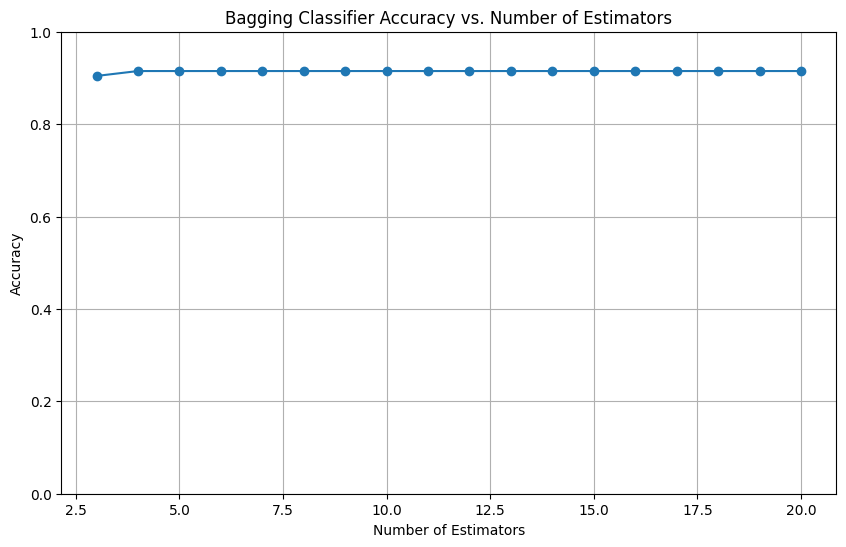

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training and testing datasets
train_data = pd.read_csv('hd_training_80.csv')
test_data = pd.read_csv('hd_testing_20.csv')

# Assuming the last column is the target
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Extract feature names
feature_names = X_train.columns

# Sample input for prediction with correct feature names
# Ensure sample_input has the same number of features as X_train
sample_input = pd.DataFrame([[0.0582010582, 0, 0.5, 0.3301886792, 0, 0.09677419355, 1, 0, 0.6666666667, 0, 0, 0, 0, 0, 0, 0, 0]],
                            columns=feature_names)  # Added 4 zero features as placeholders

# Initialize lists to store the number of estimators and corresponding accuracies
estimators = list(range(3, 21))
accuracies = []

# Loop through n_estimators from 3 to 20
for n_estimators in estimators:
    # Create and train the BaggingClassifier with a Naive Bayes estimator
    clf = BaggingClassifier(base_estimator=GaussianNB(),
                            n_estimators=n_estimators,
                            random_state=0).fit(X_train, y_train)
    
    # Make a prediction
    prediction = clf.predict(sample_input)
    print(f'Prediction with n_estimators={n_estimators}: {prediction}')
    
    # Evaluate the model on the testing set
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with n_estimators={n_estimators}: {accuracy:.4f}')

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(estimators, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Bagging Classifier Accuracy vs. Number of Estimators')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Kesimpulan: prediksi tertinggi itu menggunakan n_estimator= 10, dimana nilai yang dihasilkan paling tinggi dari n_enstimator sebelum-sebelumnya.

## Pembuatan Website atau Aplikasi

Untuk pembuatan website kami menggunakan pickle, yang setelah data ditraining dapat disimpan ke dalam file menggunakan library Pickle. Maka dapatlah website yang dapat memprediksi diagnosa penyakit jantung.

### Pickle

Kami memiliki 2 model, yakni untuk preprocessing menggunakan min-max normalization dan ensemble bagging:

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Membaca data dari file CSV
data = pd.read_csv('dataset_tanpa_outlier.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('class', axis=1)  # Jika targetnya disebut 'target'
y = data['class']

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Menyimpan scaler ke file pickle
scaler_filename = "preprocessing.pickle"
pickle.dump(scaler, open(scaler_filename, "wb"))

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menentukan kisaran nilai K yang ingin diuji
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Inisialisasi Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Melatih model menggunakan Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Menampilkan hasil Grid Search
print("K optimal: ", grid_search.best_params_)

# Menggunakan model terbaik untuk prediksi pada data uji
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Menghitung dan menampilkan akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi pada data uji: ", accuracy)

# Menyimpan model yang sudah dilatih ke file pickle
model_filename = "knn_model.pickle"
pickle.dump(best_knn, open(model_filename, "wb"))

K optimal:  {'n_neighbors': 1}
Akurasi pada data uji:  0.9680851063829787


Disini kami memilih ensemble bagging diantara model lainnya(yakni perhitungan knn k =5, stacking) dikarenakan keakuratan tertinggi diperoleh dari ensemble bagging (0,96808).

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle

# Load the training and testing datasets
train_data = pd.read_csv('hd_training_80.csv')
test_data = pd.read_csv('hd_testing_20.csv')

# Assuming the last column is the target
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Check class balance
print("Class distribution in training set:")
print(y_train.value_counts())

print("Class distribution in test set:")
print(y_test.value_counts())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
scaler_filename = "preprocessing.pickle"
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Number of estimators
n_estimators = 10

# Create and train the BaggingClassifier with a Naive Bayes estimator
clf = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=n_estimators, random_state=0)
clf.fit(X_train_scaled, y_train)

# Save the trained model to a pickle file
model_filename = "bagging_classifier_model.pickle"
with open(model_filename, 'wb') as model_file:
    pickle.dump(clf, model_file)

# Make a prediction on the sample input from the training data
sample_input = X_train.iloc[0].values.reshape(1, -1)
sample_input_scaled = scaler.transform(sample_input)
prediction = clf.predict(sample_input_scaled)
print(f'Prediction with n_estimators={n_estimators} for sample input: {prediction}')

# Evaluate the model on the testing set
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with n_estimators={n_estimators}: {accuracy:.4f}')

# Classification report for detailed analysis
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the results to a DataFrame and then to a CSV file
results_df = pd.DataFrame({
    'n_estimators': [n_estimators],
    'accuracy': [accuracy]
})
results_df.to_csv('bagging.csv', index=False)

# Generate random data for predictions
np.random.seed(0)  # Set seed for reproducibility
random_data = np.random.rand(len(X_train), len(X_train.columns))
random_data_scaled = scaler.transform(random_data)

# Make predictions on the random data
random_predictions = clf.predict(random_data_scaled)

# Save the final model's predictions on the entire training set along with Bagging value
train_predictions_df = pd.DataFrame({
    'bagging': [n_estimators] * len(random_predictions),
    'prediction': random_predictions
})
train_predictions_df.to_csv('train_predictions.csv', index=False)


Class distribution in training set:
class
1    229
2    145
Name: count, dtype: int64
Class distribution in test set:
class
1    63
2    31
Name: count, dtype: int64
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Prediction with n_estimators=10 for sample input: [2]
Accuracy with n_estimators=10: 0.9149
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.92      0.94        63
           2       0.85      0.90      0.88        31

    accuracy                           0.91        94
   macro avg       0.90      0.91      0.91        94
weighted avg       0.92      0.91      0.92        94



Selanjutnya kami menampilkan prediksi dari sample yang diberikan, yakni sebagai berikut:

In [ ]:
import pickle
import pandas as pd

# Load the trained model
model_filename = 'bagging_classifier_model.pickle'
with open(model_filename, 'rb') as model_file:
    modelku = pickle.load(model_file)

# Load the pre-processing scaler
scaler_filename = 'preprocessing.pickle'
with open(scaler_filename, 'rb') as scaler_file:
    pra_proses = pickle.load(scaler_file)

# Sample data for prediction
data_sample = [0.0582010582, 0, 0.5, 0.3301886792, 0, 0.09677419355, 1, 0, 0.6666666667, 0, 0, 0, 0, 0, 0, 0, 0]
arr = [data_sample]

# Pre-process the data sample
hasil = pra_proses.transform(arr)

# Predict using the loaded model
prediksi = modelku.predict(hasil)

# Display the prediction result
print("Hasil Prediksi:", prediksi)


Hasil Prediksi: [1]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Kesimpulan: Dari program diatas, dapat disimpulkan bahwa hasil prediksinya adalah 1, yakni memiliki penyakit diabetes tahap awal.

### 

### 

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=372a0db8-c43f-4ee7-b111-2d7f6e45443e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>